In [5]:
import nltk
nltk.download('all')  # Download all NLTK resources


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root

True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


<ipython-input-7-08b06feed8a4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="coolwarm")


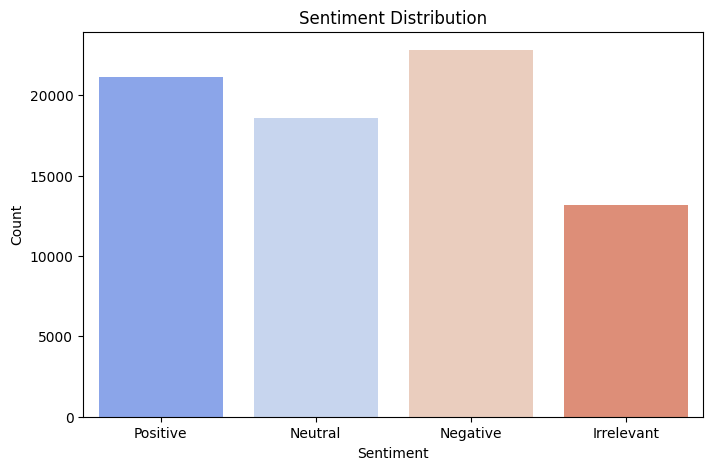

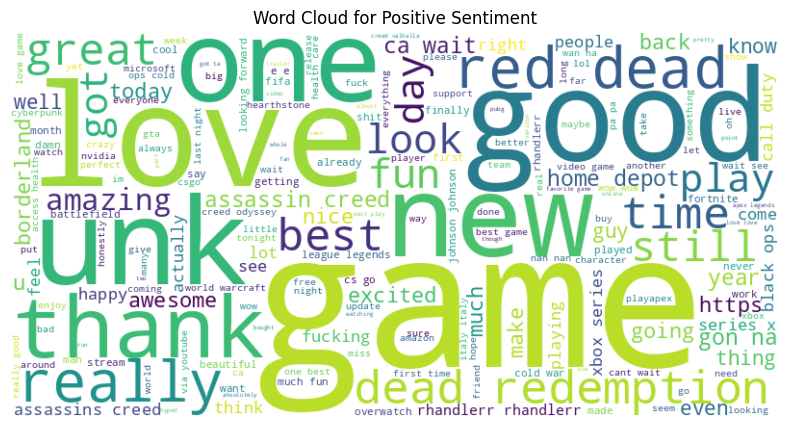

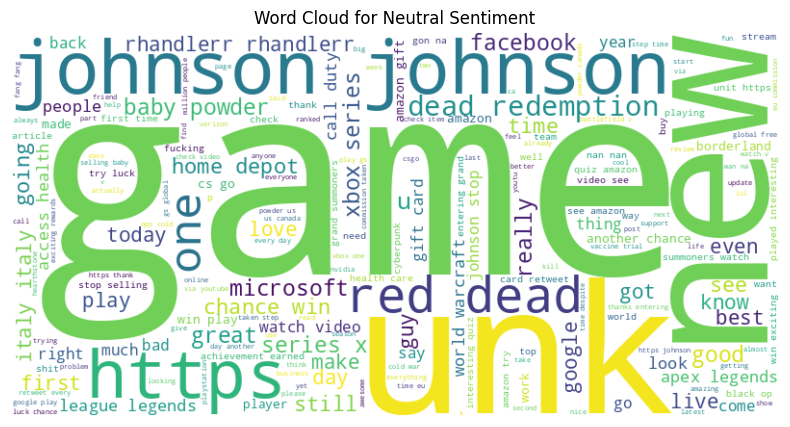

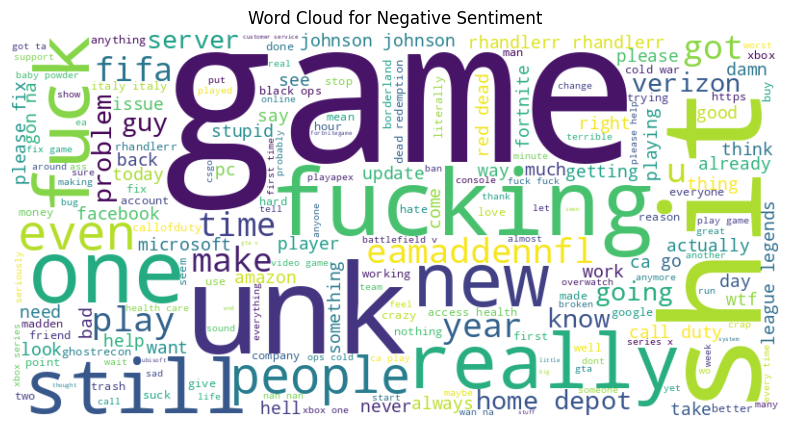

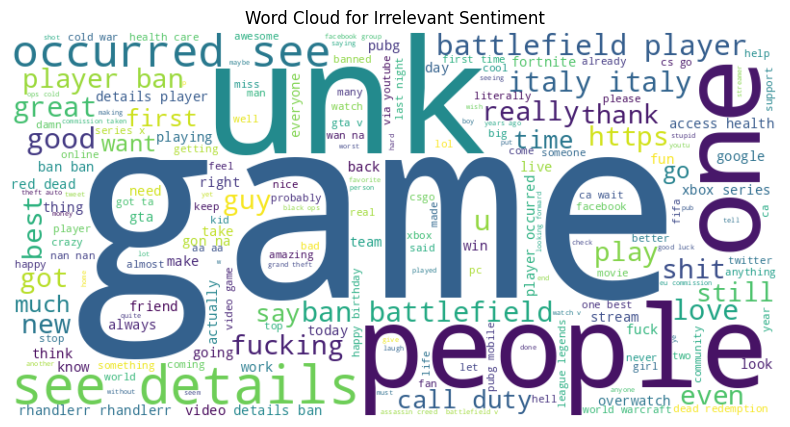

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure necessary resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Load datasets
train_data_path = "/content/twitter_training.csv"
val_data_path = "/content/twitter_validation.csv"

df_train = pd.read_csv(train_data_path, header=None, names=["ID", "Entity", "Sentiment", "Text"])
df_val = pd.read_csv(val_data_path, header=None, names=["ID", "Entity", "Sentiment", "Text"])

# Merge datasets
df = pd.concat([df_train, df_val], ignore_index=True)

# Display dataset overview
print(df.head())

# Sentiment distribution visualization
plt.figure(figsize=(8,5))
sns.countplot(x=df["Sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply text preprocessing
df["Processed_Text"] = df["Text"].apply(preprocess_text)

# Generate Word Clouds for each Sentiment
sentiments = df["Sentiment"].unique()

for sentiment in sentiments:
    text_data = " ".join(df[df["Sentiment"] == sentiment]["Processed_Text"])

    if text_data.strip():  # Ensure there's text
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        plt.figure(figsize=(10,5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for {sentiment} Sentiment")
        plt.axis("off")
        plt.show()
